In [221]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import urllib
import os
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)

from altair import Chart, X, Y, Axis, SortField

pd.options.display.max_rows = 100
pd.options.display.max_columns = 100
pd.options.display.float_format = '{:.1f}'.format

%matplotlib inline

In [222]:
df =pd.read_excel('Online Retail.xlsx')

In [223]:
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00        2.5     17850.0  United Kingdom  
1 2010-12-01 08:26:00        3.4     17850.0  United Kingdom  
2 2010-12-01 08:26:00        2.8     17850.0  United Kingdom  
3 2010-12-01 08:26:00        3.4     17850.0  United Kingdom  
4 2010-12-01 08:26:00        3.4     17850.0  United Kingdom

In [224]:
df = df.dropna()

In [225]:
df.shape

(406829, 8)

In [226]:
df.drop_duplicates(inplace=True)

In [227]:
df.shape

(401604, 8)

In [228]:
df["Description"].nunique()

3896

In [229]:
df["Description"].value_counts().head()

WHITE HANGING HEART T-LIGHT HOLDER    2058
REGENCY CAKESTAND 3 TIER              1894
JUMBO BAG RED RETROSPOT               1659
PARTY BUNTING                         1409
ASSORTED COLOUR BIRD ORNAMENT         1405
Name: Description, dtype: int64

In [230]:
df.groupby("Description").agg({"Quantity":"sum"}).head()

Quantity
Description                             
 4 PURPLE FLOCK DINNER CANDLES       138
 50'S CHRISTMAS GIFT BAG LARGE      1883
 DOLLY GIRL BEAKER                  2387
 I LOVE LONDON MINI BACKPACK         359
 I LOVE LONDON MINI RUCKSACK           1

In [231]:
df["InvoiceNo"].nunique()

22190

In [232]:
df['TotalPrice'] = df['Quantity']*df['UnitPrice']

In [233]:
df.groupby('InvoiceNo').agg({'TotalPrice':'sum'}).head()

TotalPrice
InvoiceNo            
536365          139.1
536366           22.2
536367          278.7
536368           70.1
536369           17.9

In [234]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'].dt.strftime('%Y-%m-%d'))
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

  InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  
0  2010-12-01        2.5     17850.0  United Kingdom        15.3  
1  2010-12-01        3.4     17850.0  United Kingdom        20.3  
2  2010-12-01        2.8     17850.0  United Kingdom        22.0  
3  2010-12-01        3.4     17850.0  United Kingdom        20.3  
4  2010-12-01        3.4     17850.0  United Kingdom        20.3

In [235]:
df['Country'].value_counts()

United Kingdom          356728
Germany                   9480
France                    8475
EIRE                      7475
Spain                     2528
Netherlands               2371
Belgium                   2069
Switzerland               1877
Portugal                  1471
Australia                 1258
Norway                    1086
Italy                      803
Channel Islands            757
Finland                    695
Cyprus                     611
Sweden                     461
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
USA                        291
Israel                     247
Unspecified                241
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon                     45
Lithuani

In [236]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
TotalPrice     0
dtype: int64

In [237]:
df.dropna(inplace =True)

In [238]:
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

  InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  
0  2010-12-01        2.5     17850.0  United Kingdom        15.3  
1  2010-12-01        3.4     17850.0  United Kingdom        20.3  
2  2010-12-01        2.8     17850.0  United Kingdom        22.0  
3  2010-12-01        3.4     17850.0  United Kingdom        20.3  
4  2010-12-01        3.4     17850.0  United Kingdom        20.3

In [239]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
TotalPrice     0
dtype: int64

In [240]:
df.isnull().any()

InvoiceNo      False
StockCode      False
Description    False
Quantity       False
InvoiceDate    False
UnitPrice      False
CustomerID     False
Country        False
TotalPrice     False
dtype: bool

In [241]:
df

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

       InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  
0       2010-12-01        2.5     17850.0  United Kingdom        15.3  
1       2010-12-01        3.4     17850.0  United Kingdom        20.3  
2       2010-12-01        2.8     17850.0  United Kingdom        22.0  
3       2010-12-01        3.4     17850.0  United Kingdom        20.3  
4       2010-12-01        3.4     17850.0  United Kingdom        20.3  
...            ...        ...         ...             ...         ...  
541904  2011-12-09        0.8     12680.0          France        10.2  
541905  2011-12-09        2.1     12680.0          France        12.6  
541906  2011-12-09        4.2     12680.0          France        16.6  
541907  2011-12-09        4.2     12680.0          France        16.6  
541908  2011-12-09        5.0     12680.0          France        14.9  

[401604 rows x 9 columns]

In [242]:
df.to_csv('Cleaned_Data2.csv')

In [155]:
df3 = df[df['UnitPrice']>0]

In [156]:
df3['InvoiceDate'] = df3['InvoiceDate'].astype('datetime64[ns]')
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401563 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401563 non-null  object        
 1   StockCode    401563 non-null  object        
 2   Description  401563 non-null  object        
 3   Quantity     401563 non-null  int64         
 4   InvoiceDate  401563 non-null  datetime64[ns]
 5   UnitPrice    401563 non-null  float64       
 6   CustomerID   401563 non-null  float64       
 7   Country      401563 non-null  object        
 8   TotalPrice   401563 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 30.6+ MB


<ipython-input-156-59fe6ca71774>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [157]:
df3['year'] = df3['InvoiceDate'].dt.year
df3['month'] = df3['InvoiceDate'].dt.month
df3['day'] = df3['InvoiceDate'].dt.day
df3['week'] = df3['InvoiceDate'].dt.week
df3['weekday'] = df3['InvoiceDate'].dt.weekday
df3['dayofyear'] = df3['InvoiceDate'].dt.dayofyear

<ipython-input-157-5e04b2e4f2af>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-157-5e04b2e4f2af>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-157-5e04b2e4f2af>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-157-5e0

In [158]:
df3.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

  InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  year  month  \
0  2010-12-01        2.5     17850.0  United Kingdom        15.3  2010     12   
1  2010-12-01        3.4     17850.0  United Kingdom        20.3  2010     12   
2  2010-12-01        2.8     17850.0  United Kingdom        22.0  2010     12   
3  2010-12-01        3.4     17850.0  United Kingdom        20.3  2010     12   
4  2010-12-01        3.4     17850.0  United Kingdom        20.3  2010     12   

   day  week  weekday  dayofyear  
0    1    48        2        335  
1    1    48        2        335  
2    1    48        2        335  
3    1    48        2        335  
4    1    48        2        335

In [159]:
from pandas_profiling import ProfileReport

In [91]:
profile = ProfileReport(df3, title = "Online Retail Sales")
profile

In [160]:
df3.head(15)

InvoiceNo StockCode                          Description  Quantity  \
0     536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1     536365     71053                  WHITE METAL LANTERN         6   
2     536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3     536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4     536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
5     536365     22752         SET 7 BABUSHKA NESTING BOXES         2   
6     536365     21730    GLASS STAR FROSTED T-LIGHT HOLDER         6   
7     536366     22633               HAND WARMER UNION JACK         6   
8     536366     22632            HAND WARMER RED POLKA DOT         6   
9     536367     84879        ASSORTED COLOUR BIRD ORNAMENT        32   
10    536367     22745           POPPY'S PLAYHOUSE BEDROOM          6   
11    536367     22748            POPPY'S PLAYHOUSE KITCHEN         6   
12    536367     22749    FELTCRAFT PRINCESS CHARLOTTE DOLL         8   
13    536367     22310              IVORY KNITTED MUG COSY          6   
14    536367     84969   BOX OF 6 ASSORTED COLOUR TEASPOONS         6   

   InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  year  \
0   2010-12-01        2.5     17850.0  United Kingdom        15.3  2010   
1   2010-12-01        3.4     17850.0  United Kingdom        20.3  2010   
2   2010-12-01        2.8     17850.0  United Kingdom        22.0  2010   
3   2010-12-01        3.4     17850.0  United Kingdom        20.3  2010   
4   2010-12-01        3.4     17850.0  United Kingdom        20.3  2010   
5   2010-12-01        7.7     17850.0  United Kingdom        15.3  2010   
6   2010-12-01        4.2     17850.0  United Kingdom        25.5  2010   
7   2010-12-01        1.9     17850.0  United Kingdom        11.1  2010   
8   2010-12-01        1.9     17850.0  United Kingdom        11.1  2010   
9   2010-12-01        1.7     13047.0  United Kingdom        54.1  2010   
10  2010-12-01        2.1     13047.0  United Kingdom        12.6  2010   
11  2010-12-01        2.1     13047.0  United Kingdom        12.6  2010   
12  2010-12-01        3.8     13047.0  United Kingdom        30.0  2010   
13  2010-12-01        1.6     13047.0  United Kingdom         9.9  2010   
14  2010-12-01        4.2     13047.0  United Kingdom        25.5  2010   

    month  day  week  weekday  dayofyear  
0      12    1    48        2        335  
1      12    1    48        2        335  
2      12    1    48        2        335  
3      12    1    48        2        335  
4      12    1    48        2        335  
5      12    1    48        2        335  
6      12    1    48        2        335  
7      12    1    48        2        335  
8      12    1    48        2        335  
9      12    1    48        2        335  
10     12    1    48        2        335  
11     12    1    48        2        335  
12     12    1    48        2        335  
13     12    1    48        2        335  
14     12    1    48        2        335

In [161]:
df5 = df3.sort_values('Quantity', ascending = False)
df5.head(11)

InvoiceNo StockCode                          Description  Quantity  \
540421    581483     23843          PAPER CRAFT , LITTLE BIRDIE     80995   
61619     541431     23166       MEDIUM CERAMIC TOP STORAGE JAR     74215   
421632    573008     84077    WORLD WAR 2 GLIDERS ASSTD DESIGNS      4800   
206121    554868     22197                 SMALL POPCORN HOLDER      4300   
97432     544612     22053                EMPIRE DESIGN ROSETTE      3906   
270885    560599     18007  ESSENTIAL BALM 3.5g TIN IN ENVELOPE      3186   
160546    550461     21108   FAIRY CAKE FLANNEL ASSORTED COLOUR      3114   
52711     540815     21108   FAIRY CAKE FLANNEL ASSORTED COLOUR      3114   
433788    573995     16014          SMALL CHINESE STYLE SCISSOR      3000   
291249    562439     84879        ASSORTED COLOUR BIRD ORNAMENT      2880   
4945      536830     84077    WORLD WAR 2 GLIDERS ASSTD DESIGNS      2880   

       InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  year  \
540421  2011-12-09        2.1     16446.0  United Kingdom    168469.6  2011   
61619   2011-01-18        1.0     12346.0  United Kingdom     77183.6  2011   
421632  2011-10-27        0.2     12901.0  United Kingdom      1008.0  2011   
206121  2011-05-27        0.7     13135.0  United Kingdom      3096.0  2011   
97432   2011-02-22        0.8     18087.0  United Kingdom      3202.9  2011   
270885  2011-07-19        0.1     14609.0  United Kingdom       191.2  2011   
160546  2011-04-18        2.1     15749.0  United Kingdom      6539.4  2011   
52711   2011-01-11        2.1     15749.0  United Kingdom      6539.4  2011   
433788  2011-11-02        0.3     16308.0  United Kingdom       960.0  2011   
291249  2011-08-04        1.4     12931.0  United Kingdom      4176.0  2011   
4945    2010-12-02        0.2     16754.0  United Kingdom       518.4  2010   

        month  day  week  weekday  dayofyear  
540421     12    9    49        4        343  
61619       1   18     3        1         18  
421632     10   27    43        3        300  
206121      5   27    21        4        147  
97432       2   22     8        1         53  
270885      7   19    29        1        200  
160546      4   18    16        0        108  
52711       1   11     2        1         11  
433788     11    2    44        2        306  
291249      8    4    31        3        216  
4945       12    2    48        3        336

In [162]:
df5['Description']= df5['Description'].str.strip()

In [163]:
df5.head()

InvoiceNo StockCode                        Description  Quantity  \
540421    581483     23843        PAPER CRAFT , LITTLE BIRDIE     80995   
61619     541431     23166     MEDIUM CERAMIC TOP STORAGE JAR     74215   
421632    573008     84077  WORLD WAR 2 GLIDERS ASSTD DESIGNS      4800   
206121    554868     22197               SMALL POPCORN HOLDER      4300   
97432     544612     22053              EMPIRE DESIGN ROSETTE      3906   

       InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  year  \
540421  2011-12-09        2.1     16446.0  United Kingdom    168469.6  2011   
61619   2011-01-18        1.0     12346.0  United Kingdom     77183.6  2011   
421632  2011-10-27        0.2     12901.0  United Kingdom      1008.0  2011   
206121  2011-05-27        0.7     13135.0  United Kingdom      3096.0  2011   
97432   2011-02-22        0.8     18087.0  United Kingdom      3202.9  2011   

        month  day  week  weekday  dayofyear  
540421     12    9    49        4        343  
61619       1   18     3        1         18  
421632     10   27    43        3        300  
206121      5   27    21        4        147  
97432       2   22     8        1         53

In [220]:
by_month = df5.groupby('weekday')
by_month.describe()

Quantity                                          UnitPrice       \
           count mean   std      min 25% 50%  75%     max     count mean   
weekday                                                                    
0        65709.0 11.3  41.4  -3114.0 2.0 5.0 12.0  3114.0   65709.0  3.9   
1        67373.0 13.5 407.6 -74215.0 2.0 6.0 12.0 74215.0   67373.0  3.4   
2        69750.0 13.5  43.4   -828.0 2.0 6.0 12.0  3000.0   69750.0  3.3   
3        81558.0 13.7  60.8  -9360.0 2.0 6.0 12.0  4800.0   81558.0  3.4   
4        55503.0 12.9 488.1 -80995.0 2.0 6.0 12.0 80995.0   55503.0  4.0   
6        61670.0  7.4  24.1   -360.0 1.0 3.0  8.0  2160.0   61670.0  2.8   

                                      CustomerID                         \
          std min 25% 50% 75%     max      count    mean    std     min   
weekday                                                                   
0        37.2 0.0 1.2 1.9 3.8  4287.6    65709.0 15266.3 1686.5 12347.0   
1        52.7 0.0 1.2 1.9 3.8  8142.8    67373.0 15266.8 1707.2 12346.0   
2        28.5 0.0 1.2 1.9 3.8  3949.3    69750.0 15293.6 1726.9 12347.0   
3        30.6 0.0 1.2 1.9 3.8  4161.1    81558.0 15258.0 1758.5 12347.0   
4       166.7 0.0 1.2 1.9 3.8 38970.0    55503.0 15151.3 1783.5 12356.0   
6         4.0 0.0 1.2 1.7 3.8   434.5    61670.0 15446.9 1595.5 12348.0   

                                        TotalPrice                            \
            25%     50%     75%     max      count mean    std       min 25%   
weekday                                                                        
0       14083.0 15039.0 16774.0 18283.0    65709.0 19.3   87.5   -6539.4 4.2   
1       13880.0 15140.0 16729.0 18283.0    67373.0 23.2  435.2  -77183.6 5.0   
2       13959.0 15159.0 16775.0 18287.0    69750.0 21.9   68.3   -3949.3 5.0   
3       13798.0 15105.0 16839.0 18283.0    81558.0 23.3   88.8   -8322.1 5.0   
4       13588.0 15005.0 16751.5 18287.0    55503.0 22.3 1040.5 -168469.6 5.0   
6       14161.0 15506.0 16877.0 18287.0    61670.0 12.6   29.4    -434.5 3.0   

                              year                                         \
         50%  75%      max   count   mean std    min    25%    50%    75%   
weekday                                                                     
0       11.6 19.0   6539.4 65709.0 2010.9 0.2 2010.0 2011.0 2011.0 2011.0   
1       12.6 19.8  77183.6 67373.0 2011.0 0.2 2010.0 2011.0 2011.0 2011.0   
2       12.7 19.8   3949.3 69750.0 2010.9 0.3 2010.0 2011.0 2011.0 2011.0   
3       13.5 19.8   4992.0 81558.0 2010.9 0.3 2010.0 2011.0 2011.0 2011.0   
4       14.0 19.8 168469.6 55503.0 2010.9 0.2 2010.0 2011.0 2011.0 2011.0   
6        6.6 15.0   2365.2 61670.0 2010.9 0.3 2010.0 2011.0 2011.0 2011.0   

                 month                                    day               \
           max   count mean std min 25% 50%  75%  max   count mean std min   
weekday                                                                      
0       2011.0 65709.0  7.7 3.4 1.0 5.0 9.0 11.0 12.0 65709.0 15.5 8.3 1.0   
1       2011.0 67373.0  7.4 3.5 1.0 4.0 8.0 11.0 12.0 67373.0 15.0 8.6 1.0   
2       2011.0 69750.0  7.6 3.4 1.0 5.0 8.0 11.0 12.0 69750.0 15.2 8.8 1.0   
3       2011.0 81558.0  7.6 3.4 1.0 5.0 8.0 11.0 12.0 81558.0 14.8 8.6 1.0   
4       2011.0 55503.0  7.6 3.4 1.0 5.0 9.0 11.0 12.0 55503.0 14.0 8.6 1.0   
6       2011.0 61670.0  7.8 3.3 1.0 5.0 9.0 11.0 12.0 61670.0 15.7 8.8 1.0   

                              week                                    \
        25%  50%  75%  max   count mean  std min  25%  50%  75%  max   
weekday                                                                
0       7.0 14.0 22.0 31.0 65709.0 31.6 14.9 2.0 19.0 36.0 45.0 51.0   
1       7.0 15.0 22.0 31.0 67373.0 30.1 15.0 1.0 17.0 33.0 44.0 51.0   
2       8.0 15.0 23.0 31.0 69750.0 30.8 14.9 1.0 18.0 34.0 45.0 51.0   
3       8.0 14.0 22.0 31.0 81558.0 30.8 14.5 1.0 19.0 34.0 44.0 51.0   
4       7.0 13.0 21.0 30.

In [165]:
grouped_month = by_month.sum()['Quantity'].sort_values(ascending = False)
grouped_month.head()

month
11    653976
10    568890
9     536346
12    498374
8     385048
Name: Quantity, dtype: int64

In [166]:
plot = [go.Bar(x=grouped_month.index, y = grouped_month.values)]
layout = go.Layout(yaxis={'type':'log', 'autorange':True, 'title':'Log10 number of orders'},xaxis={'title':'month'})
fig = go.Figure(data=plot, layout=layout)
iplot(fig)

In [198]:
by_country = df5.groupby('Country')
by_country.describe()

Quantity                                               \
                        count mean   std      min   25%  50%   75%     max   
Country                                                                      
Australia              1255.0 66.4  97.7   -120.0   6.0 24.0  96.0  1152.0   
Austria                 401.0 12.0  21.7    -48.0   6.0  9.0  12.0   288.0   
Bahrain                  17.0 15.3  25.0      2.0   6.0  6.0   8.0    96.0   
Belgium                2069.0 11.2  13.6    -12.0   4.0 10.0  12.0   272.0   
Brazil                   32.0 11.1   8.5      2.0   3.0 10.0  18.0    24.0   
Canada                  151.0 18.3  46.7      1.0   6.0 12.0  20.0   504.0   
Channel Islands         757.0 12.5  22.6     -2.0   4.0 10.0  12.0   407.0   
Cyprus                  611.0 10.3  23.4    -33.0   2.0  5.0  12.0   288.0   
Czech Republic           30.0 19.7  22.8    -24.0  12.0 24.0  24.0    72.0   
Denmark                 389.0 21.0  27.4    -25.0  12.0 12.0  24.0   256.0   
EIRE                   7473.0 18.2  42.0   -288.0   4.0 10.0  12.0  1440.0   
European Community       61.0  8.1   6.5     -2.0   3.0  6.0  12.0    24.0   
Finland                 695.0 15.3  21.0    -27.0   6.0 10.0  12.0   144.0   
France                 8474.0 13.0  21.5   -250.0   5.0 10.0  12.0   912.0   
Germany                9478.0 12.4  17.9   -288.0   5.0 10.0  12.0   600.0   
Greece                  146.0 10.7   7.7     -1.0   5.2 10.0  12.0    48.0   
Iceland                 182.0 13.5  18.9      2.0   6.0 12.0  12.0   240.0   
Israel                  247.0 16.1  16.7    -32.0   4.0 12.0  24.0   100.0   
Italy                   803.0 10.0  13.6    -12.0   4.0  6.0  12.0   200.0   
Japan                   358.0 70.4 177.2   -624.0   4.0 36.0  72.0  2040.0   
Lebanon                  45.0  8.6   4.3      2.0   6.0  8.0  12.0    24.0   
Lithuania                35.0 18.6  10.1      6.0  12.0 16.0  24.0    48.0   
Malta                   127.0  7.4   8.1     -4.0   3.0  6.0  12.0    48.0   
Netherlands            2367.0 84.3 111.4   -480.0  16.0 72.0 100.0  2400.0   
Norway                 1085.0 17.7  22.7    -12.0   6.0 12.0  24.0   240.0   
Poland                  341.0 10.7  10.2     -6.0   4.0 10.0  12.0    72.0   
Portugal               1471.0 10.9  11.9    -12.0   4.0 10.0  12.0   120.0   
RSA                      57.0  6.2   3.3      2.0   3.0  6.0  10.0    12.0   
Saudi Arabia             10.0  7.5   5.7     -5.0   6.0  9.0  12.0    12.0   
Singapore               229.0 22.9  27.7     -1.0   8.0 12.0  24.0   288.0   
Spain                  2527.0 10.6  24.2   -288.0   3.0  6.0  12.0   360.0   
Sweden                  461.0 77.3 129.0   -240.0   8.0 20.0  96.0   768.0   
Switzerland            1876.0 15.9  19.3   -120.0   6.0 12.0  24.0   288.0   
USA                     291.0  3.6  16.5    -36.0 -10.0  5.0  12.0    72.0   
United Arab Emirates     68.0 14.4  12.5      1.0   6.0 12.0  12.0    72.0   
United Kingdom       356703.0 11.2 264.2 -80995.0   2.0  4.0  12.0 80995.0   
Unspecified             241.0  7.4   8.9      1.0   1.0  2.0  12.0    36.0   

                     UnitPrice                                     CustomerID  \
                         count  mean   std min 25% 50% 75%     max      count   
Country                                                                         
Australia               1255.0   3.2  12.5 0.2 1.2 1.8 3.8   350.0     1255.0   
Austria                  401.0   4.2   7.4 0.1 1.2 1.9 4.2    40.0      401.0   
Bahrain                   17.0   4.6   3.7 1.2 1.6 3.0 5.0    12.8       17.0   
Belgium                 2069.0   3.6   4.2 0.1 1.2 1.9 4.2    40.0     2069.0   
Brazil                    32.0   4.5   2.8 0.8 2.0 3.3 6.8    10.9       32.0   
Canada                   151.0   6.0  44.7 0.1 0.8 1.6 3.0   550.9      151.0   
Channel Islands          757.0   4.9  15.6 0.2 1.4 2.5 6.2   293.0      757.0   
Cyprus                   611.0   6.4  22.6 0.1 1.2 3.0 5.0   320.7      611.0   
Czech Rep

In [199]:
grouped_country = df5.groupby(['Country']).sum()['Quantity'].sort_values(ascending = False)
grouped_country.head()

Country
United Kingdom    3982136
Netherlands        199552
EIRE               135937
Germany            117339
France             109805
Name: Quantity, dtype: int64

In [201]:
plot = [go.Bar(x=grouped_country.index, y = grouped_country.values)]
layout = go.Layout(yaxis={'type': 'log', 'autorange':True, 'title':'Log10 number of orders'},xaxis={'title':'Countries'})
fig = go.Figure(data=plot, layout=layout)
iplot(fig)

In [202]:
df9 = df5.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)['InvoiceDate'].count()
products_per_invoice = df9.rename(columns = {'InvoiceDate':'Number of products'})
products_per_invoice[:10].sort_values('Number of products', ascending=False)

CustomerID InvoiceNo  Number of products
7     12347.0    573511                  47
2     12347.0    537626                  31
3     12347.0    542237                  29
4     12347.0    549222                  24
6     12347.0    562032                  22
5     12347.0    556201                  18
9     12348.0    539318                  17
8     12347.0    581180                  11
0     12346.0    541431                   1
1     12346.0   C541433                   1

In [205]:
products_per_invoice.isnull().any()

CustomerID            False
InvoiceNo             False
Number of products    False
dtype: bool

In [206]:
most_product_per_customer = df5.groupby(by=['CustomerID'], as_index=False)['InvoiceDate'].count()
products_per_customer = most_product_per_customer.rename(columns = {'InvoiceDate':'Number of products'})
top_customers = products_per_customer.sort_values('Number of products', ascending=False)
top_customers.head(10)

CustomerID  Number of products
4041     17841.0                7812
1894     14911.0                5896
1299     14096.0                5128
330      12748.0                4458
1673     14606.0                2759
2191     15311.0                2478
1702     14646.0                2081
568      13089.0                1853
697      13263.0                1667
1446     14298.0                1640

In [207]:
grouped = top_customers[:50]
grouped.reset_index(level=0, inplace=True)
grouped.sort_values('Number of products', ascending=False, inplace=True)
grouped['CustomerID'] = grouped['CustomerID'].astype(str)

<ipython-input-207-89fa26be0422>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-207-89fa26be0422>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



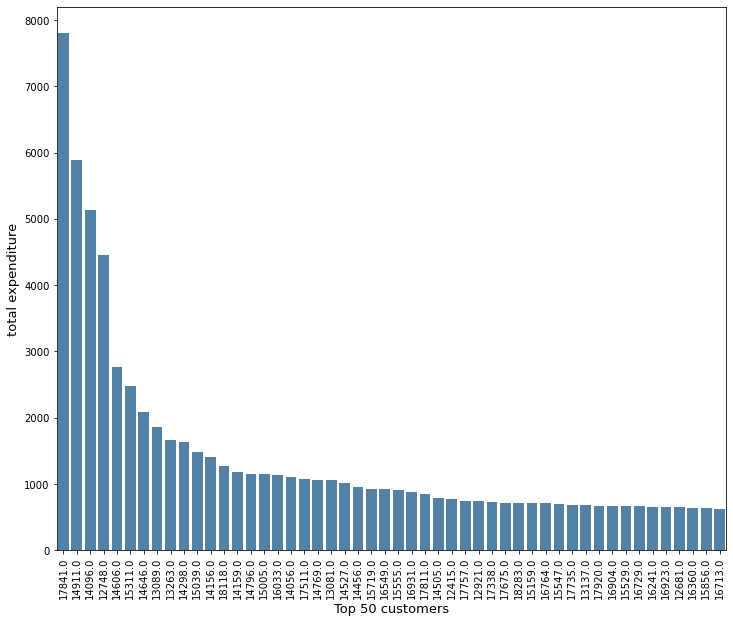

In [216]:
f, ax = plt.subplots(figsize=(12, 10))
plt.xticks(rotation='vertical')
sns.barplot(x=grouped['CustomerID'], y=grouped['Number of products'],order=grouped['CustomerID'],color='steelblue',ci=None)
plt.ylabel('total expenditure', fontsize=13)
plt.xlabel('Top 50 customers', fontsize=13)
plt.show()

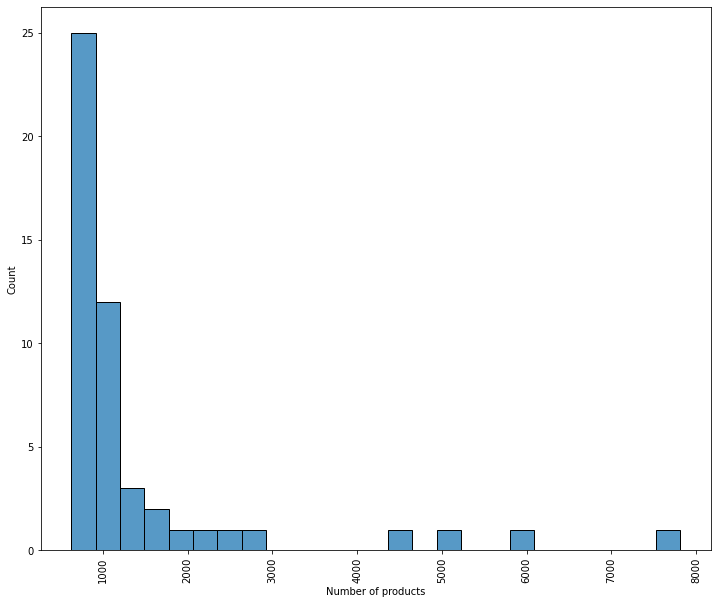

In [219]:
f, ax = plt.subplots(figsize=(12, 10))
plt.xticks(rotation='vertical')
sns.histplot(data = grouped['Number of products'])

In [93]:
most_sold = df3['Description'].value_counts().head(15)

In [94]:
print(most_sold)

WHITE HANGING HEART T-LIGHT HOLDER    2070
REGENCY CAKESTAND 3 TIER              1904
JUMBO BAG RED RETROSPOT               1662
ASSORTED COLOUR BIRD ORNAMENT         1418
PARTY BUNTING                         1415
LUNCH BAG RED RETROSPOT               1358
SET OF 3 CAKE TINS PANTRY DESIGN      1232
POSTAGE                               1196
LUNCH BAG  BLACK SKULL.               1126
PACK OF 72 RETROSPOT CAKE CASES       1080
PAPER CHAIN KIT 50'S CHRISTMAS        1029
SPOTTY BUNTING                        1029
LUNCH BAG SPACEBOY DESIGN             1021
LUNCH BAG CARS BLUE                   1012
NATURAL SLATE HEART CHALKBOARD         997
Name: Description, dtype: int64


Text(0.5, 1.0, 'Items Most Sold')

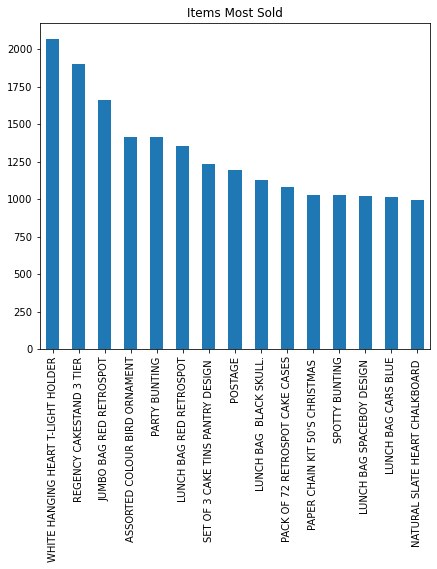

In [95]:
plt.figure(figsize=(7,6))
most_sold.plot(kind='bar')
plt.title('Items Most Sold')

In [96]:
df4 = df3['Description']

In [97]:
December_sales = df4[df3['month']==12].value_counts().head(40)

Text(0.5, 1.0, 'Items Most Sold on December')

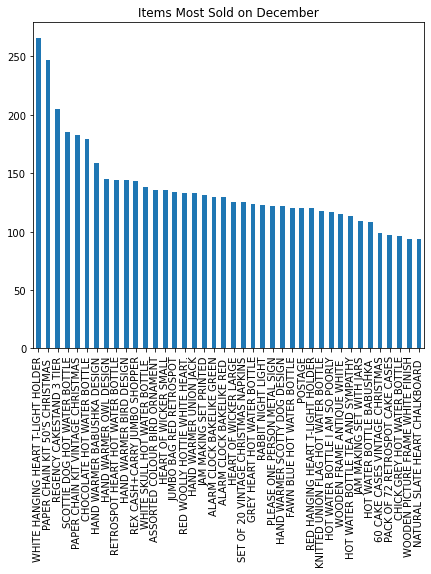

In [98]:
plt.figure(figsize=(7,6))
December_sales.plot(kind='bar')
plt.title('Items Most Sold on December')

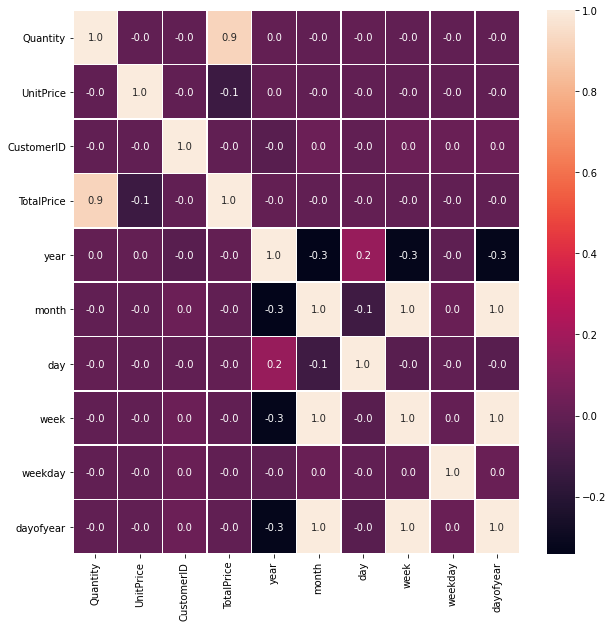

In [217]:
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df5.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax);

In [99]:
df6 = df3.groupby(['Description', 'month']).agg({'Quantity':'sum', 'TotalPrice':'sum'})

In [100]:
df6.head(30)

Quantity  TotalPrice
Description                    month                      
 4 PURPLE FLOCK DINNER CANDLES 1             2        5.10
                               2             1        2.55
                               4             8       20.40
                               5             3        7.65
                               6             2        5.10
                               7             3        7.65
                               8             1        2.55
                               9             9       22.95
                               10            3        7.65
                               11           45      114.75
                               12           63       74.41
 50'S CHRISTMAS GIFT BAG LARGE 8            24       30.00
                               9           329      411.25
                               10          991     1154.75
                               11          485      606.25
                               12           54       67.50
 DOLLY GIRL BEAKER             7            67       83.75
                               8           945     1079.25
                               9           608      692.00
                               10          549      618.25
                               11          148      185.00
                               12           74       92.50
 I LOVE LONDON MINI BACKPACK   9           146      585.90
                               10           51      211.65
                               11          142      569.30
                               12           21       87.15
 I LOVE LONDON MINI RUCKSACK   10            1        4.15
 NINE DRAWER OFFICE TIDY       10           28      403.90
                               11           18      254.40
                               12            9      134.55

In [ ]:
by_country = df5.groupby('Country')
by_country.describe()